# LaLiga Data Analysis

Write a Jupyter Notebook called LaLigaDataAnalysis.ipynb in folder analysis/ with your answers to the following exercises/questions. Once you are done with it, export it to HTML and save the result in reports/ folder from the repo. Make sure that your notebook can be rerun from scratch without any errors.

In [3]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [4]:
con = sqlite3.connect("laliga.sqlite")
query = "SELECT * from 'MATCHES'"
df = pd.read_sql_query(query, con)
con.close()
df

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,None
48776,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,None
48777,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,None
48778,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,None


In [5]:
df = df.dropna(subset=["score"])
df

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
48345,2021-2022,2,3,8/28/21,10:00 PM,Ponferradina,Girona,2:1
48346,2021-2022,2,3,8/29/21,5:00 PM,SD Amorebieta,UD Almería,2:1
48347,2021-2022,2,3,8/29/21,7:30 PM,CD Lugo,Real Valladolid,0:2
48348,2021-2022,2,3,8/29/21,7:30 PM,Real Sociedad B,CF Fuenlabrada,0:0


1. Is it true that the home team is more likely to win? Make a pie chart showing the result distribution (whether home team wins, visitor team wins, or there's a tie) of all matches in the data. Write in the plot the percentage of each category.

In [6]:

df["goals_home"] = df["score"].str.split(":").str[0].astype("Int64")
df["goals_visitor"] = df["score"].str.split(":").str[1].astype("Int64")
df.dtypes

/tmp/ipykernel_756/2171894598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["goals_home"] = df["score"].str.split(":").str[0].astype("Int64")
/tmp/ipykernel_756/2171894598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["goals_visitor"] = df["score"].str.split(":").str[1].astype("Int64")


season           object
division          int64
matchday          int64
date             object
time             object
home_team        object
away_team        object
score            object
goals_home        Int64
goals_visitor     Int64
dtype: object

In [7]:
df["result"] = np.where(df["goals_home"] > df["goals_visitor"], 'home',
                        np.where(df["goals_home"] < df["goals_visitor"], 'away', 'tie'))

df

/tmp/ipykernel_756/661091883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["result"] = np.where(df["goals_home"] > df["goals_visitor"], 'home',


,season,division,matchday,date,time,home_team,away_team,score,goals_home,goals_visitor,result
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2,3,away
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,3,2,home
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,5,0,home
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,1,1,tie
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,0,2,away
...,...,...,...,...,...,...,...,...,...,...,...
48345,2021-2022,2,3,8/28/21,10:00 PM,Ponferradina,Girona,2:1,2,1,home
48346,2021-2022,2,3,8/29/21,5:00 PM,SD Amorebieta,UD Almería,2:1,2,1,home
48347,2021-2022,2,3,8/29/21,7:30 PM,CD Lugo,Real Valladolid,0:2,0,2,away
48348,2021-2022,2,3,8/29/21,7:30 PM,Real Sociedad B,CF Fuenlabrada,0:0,0,0,tie


In [8]:
genre_counts = df["result"].value_counts()
genre_counts

result
home    25321
tie     12280
away    10399
Name: count, dtype: int64

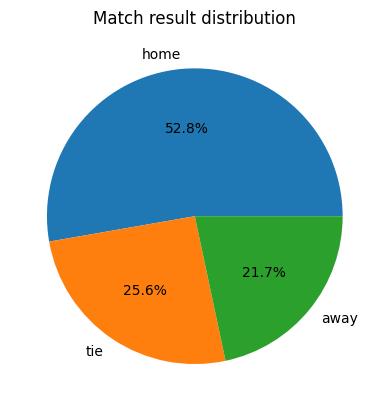

In [9]:
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title("Match result distribution")
plt.show()

2. What are the top ten scoring teams of all time? What are the ten teams that concede the most? Make two bar plot charts showing each of them. Consider only matches played in 1st division.
What have been the biggest wins? Of course, when we say biggest we mean
those with the highest goal difference. Show the top ten of them in a table.

In [4]:
df1 = df.loc[df["division"] == 1].dropna(subset=["score"])
df1

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
47963,2021-2022,1,3,8/28/21,10:00 PM,Real Betis,Real Madrid,0:1
47964,2021-2022,1,3,8/29/21,5:00 PM,Barcelona,Getafe,2:1
47965,2021-2022,1,3,8/29/21,7:30 PM,Cádiz CF,CA Osasuna,2:3
47966,2021-2022,1,3,8/29/21,7:30 PM,Rayo Vallecano,Granada CF,4:0


In [8]:
df1["goals_home"] = df1["goals_home"].astype(int)
df1["goals_visitor"] = df1["goals_visitor"].astype(int)
df1

,season,division,matchday,date,time,home_team,away_team,score,result,goals_home,goals_visitor
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,visitor,2,3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,home,3,2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,home,5,0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,tie,1,1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,visitor,0,2
...,...,...,...,...,...,...,...,...,...,...,...
47963,2021-2022,1,3,8/28/21,10:00 PM,Real Betis,Real Madrid,0:1,visitor,0,1
47964,2021-2022,1,3,8/29/21,5:00 PM,Barcelona,Getafe,2:1,home,2,1
47965,2021-2022,1,3,8/29/21,7:30 PM,Cádiz CF,CA Osasuna,2:3,visitor,2,3
47966,2021-2022,1,3,8/29/21,7:30 PM,Rayo Vallecano,Granada CF,4:0,home,4,0


In [9]:
df2 = df1.groupby("home_team")
df3 = df1.groupby("away_team")

<BarContainer object of 10 artists>

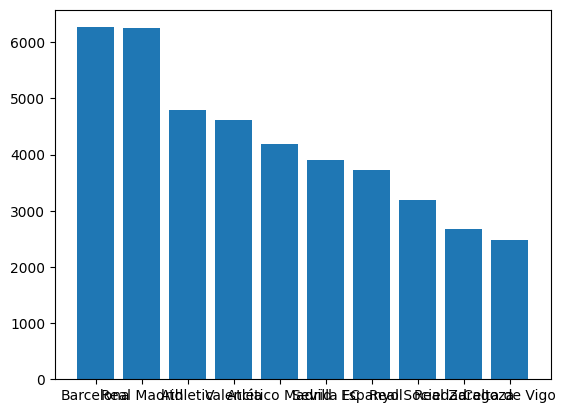

In [10]:
goals = df2["goals_home"].sum() + df3["goals_visitor"].sum()
total_goals = goals.sort_values(ascending = False).head(10)
plt.bar(total_goals.index, total_goals)

In [11]:
total_goals

home_team
Barcelona          6267
Real Madrid        6249
Athletic           4802
Valencia           4615
Atlético Madrid    4184
Sevilla FC         3903
Espanyol           3720
Real Sociedad      3200
Real Zaragoza      2683
Celta de Vigo      2483
dtype: int64

<BarContainer object of 10 artists>

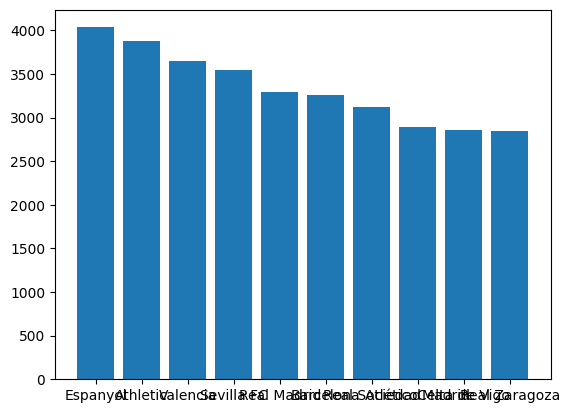

In [12]:
goals = df3["goals_home"].sum() + df2["goals_visitor"].sum()
conceded_goals = goals.sort_values(ascending = False).head(10)
plt.bar(conceded_goals.index, conceded_goals)

In [13]:
conceded_goals

away_team
Espanyol           4034
Athletic           3875
Valencia           3649
Sevilla FC         3546
Real Madrid        3287
Barcelona          3259
Real Sociedad      3126
Atlético Madrid    2894
Celta de Vigo      2856
Real Zaragoza      2847
dtype: int64

In [14]:
df1["difference"] = abs(df1["goals_home"] - df1["goals_visitor"])
df1.sort_values("difference", ascending=False).head(10)

,season,division,matchday,date,time,home_team,away_team,score,result,goals_home,goals_visitor,difference
225,1930-1931,1,10,2/8/31,None,Athletic,Barcelona,12:1,home,12,1,11
936,1940-1941,1,1,9/29/40,None,Sevilla FC,Barcelona,11:1,home,11,1,10
2787,1950-1951,1,11,11/19/50,None,Athletic,Lérida,10:0,home,10,0,10
1168,1941-1942,1,15,1/11/42,None,Athletic,Celta de Vigo,10:0,home,10,0,10
1071,1941-1942,1,1,9/28/41,None,Sevilla FC,Real Oviedo,10:0,home,10,0,10
3629,1953-1954,1,26,3/28/54,None,Barcelona,Real Oviedo,9:0,home,9,0,9
10024,1978-1979,1,16,1/14/79,None,Barcelona,Rayo Vallecano,9:0,home,9,0,9
408,1932-1933,1,10,1/29/33,None,Racing,Alavés,9:0,home,9,0,9
5027,1959-1960,1,21,2/7/60,None,Real Madrid,Elche CF,11:2,visitor,11,2,9
3911,1955-1956,1,1,9/11/55,None,Atlético Madrid,Hércules CF,9:0,home,9,0,9


In [15]:
df

,season,division,matchday,date,time,home_team,away_team,score,result,goals_home,goals_visitor
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,visitor,2,3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,home,3,2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,home,5,0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,tie,1,1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,visitor,0,2
...,...,...,...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,None,None,None,None
48776,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,None,None,None,None
48777,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,None,None,None,None
48778,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,None,None,None,None


3. There has been a lot of discussion about how LaLiga’s television rights have changed game schedules in the last years. Make a bar plot chart showing the number of matches played each weekday, and make also a histogram
of match time. Compare this two graphics between seasons 2000-2001 and 2020-2021.

In [10]:
df["date"] = pd.to_datetime(df["date"], format = "%m/%d/%y")
df["time"] = pd.to_datetime(df["time"], format = "%I:%M %p", errors = "coerce").dt.strftime("%H:%M")

/tmp/ipykernel_756/1557839628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"], format = "%m/%d/%y")
/tmp/ipykernel_756/1557839628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time"] = pd.to_datetime(df["time"], format = "%I:%M %p", errors = "coerce").dt.strftime("%H:%M")


In [11]:
weekday_counts = df["date"].dt.day_name().value_counts()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = weekday_counts.reindex(weekday_order)
weekday_counts

date
Monday         617
Tuesday        307
Wednesday     1317
Thursday       345
Friday         847
Saturday     20060
Sunday       24507
Name: count, dtype: int64

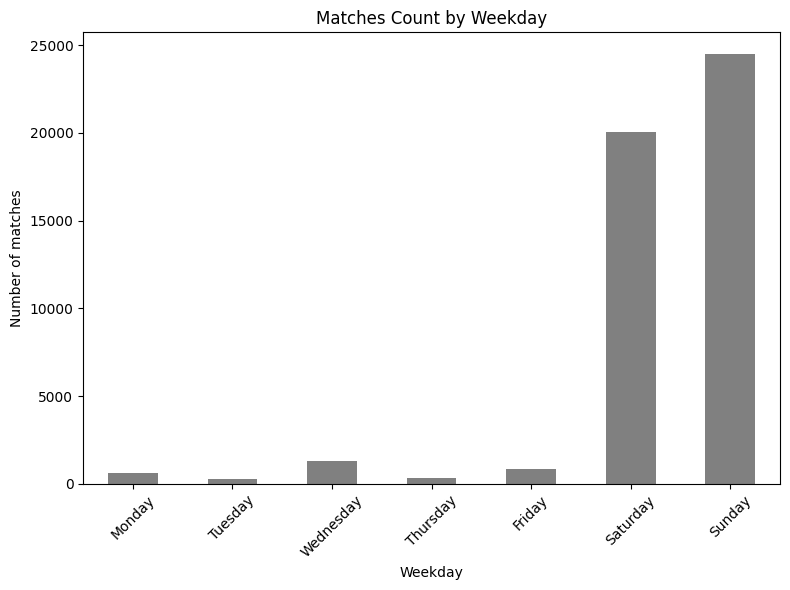

In [13]:
plt.figure(figsize=(8, 6))
weekday_counts.plot(kind='bar', color='grey')
plt.xlabel('Weekday')
plt.ylabel('Number of matches')
plt.title('Matches Count by Weekday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
hour_counts = df["time"].dropna().value_counts()
hour_counts = hour_counts.sort_index()
hours = hour_counts.index
counts = hour_counts.values
total_count = counts.sum()
relative_frequency = (counts / total_count) * 100

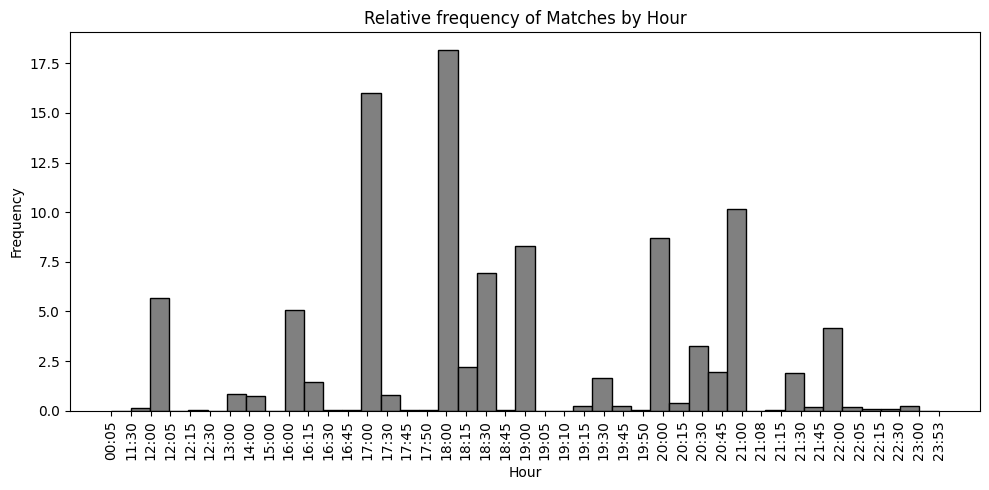

In [37]:
plt.figure(figsize=(10, 5))
plt.hist(hours, bins=len(hours), weights=relative_frequency, color='grey', edgecolor='black')
plt.title('Relative frequency of Matches by Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [26]:
def plot_weekday_bar(season):

    df_season = df[df["season"] == season]
    weekday_counts = df_season["date"].dt.day_name().value_counts()
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_counts = weekday_counts.reindex(weekday_order)
    weekday_counts

    plt.figure(figsize=(8, 6))
    weekday_counts.plot(kind='bar', color='grey')
    plt.xlabel('Weekday')
    plt.ylabel('Number of matches')
    plt.title('Matches Count by Weekday')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [33]:
def plot_matchtime_hist(season):
    
    df_season = df[df["season"] == season]
    hour_counts = df_season["time"].dropna().value_counts()
    hour_counts = hour_counts.sort_index()
    hours = hour_counts.index
    counts = hour_counts.values
    total_count = counts.sum()
    relative_frequency = (counts / total_count) * 100

    plt.figure(figsize=(10, 5))
    plt.hist(hours, bins=len(hours), weights=relative_frequency, color='grey', edgecolor='black')
    plt.title('Relative frequency of Matches by Hour')
    plt.xlabel('Hour')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.tight_layout()
    plt.show()

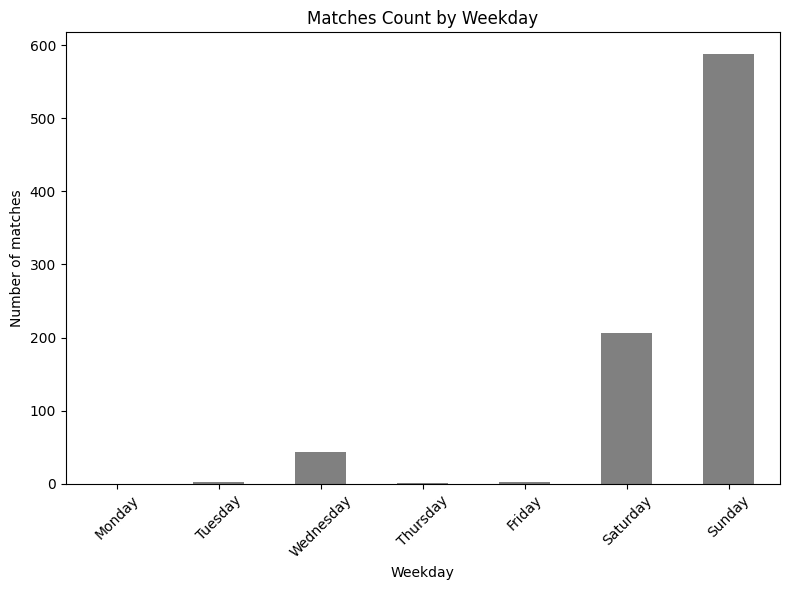

In [25]:
plot_weekday_bar("2000-2001")

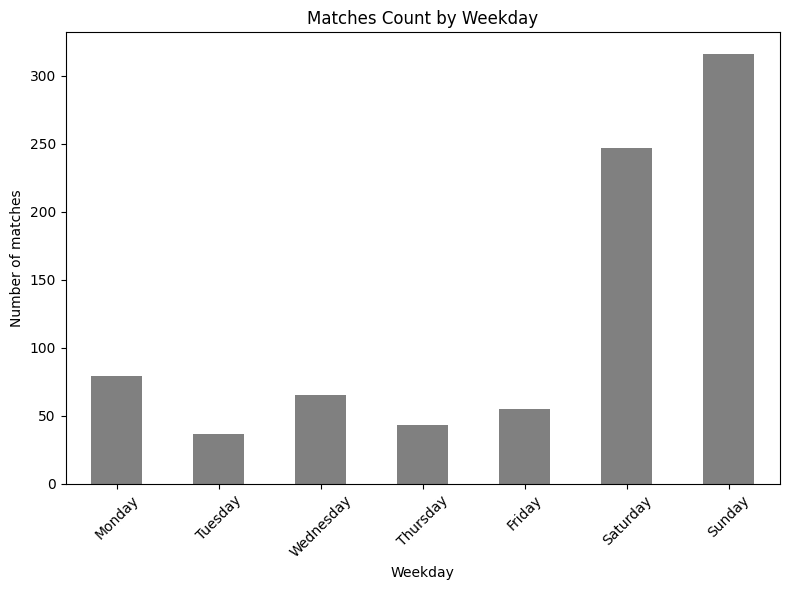

In [28]:
plot_weekday_bar("2020-2021")

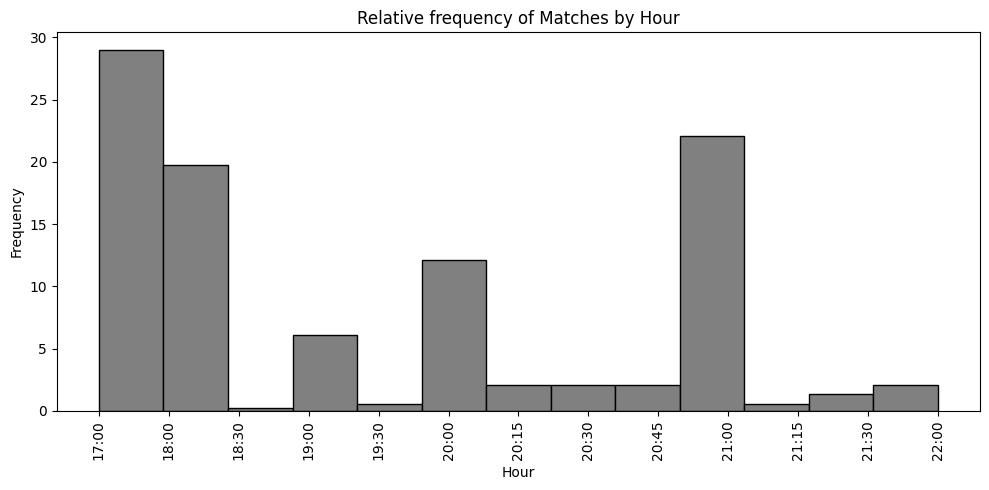

In [34]:
plot_matchtime_hist("2000-2001")

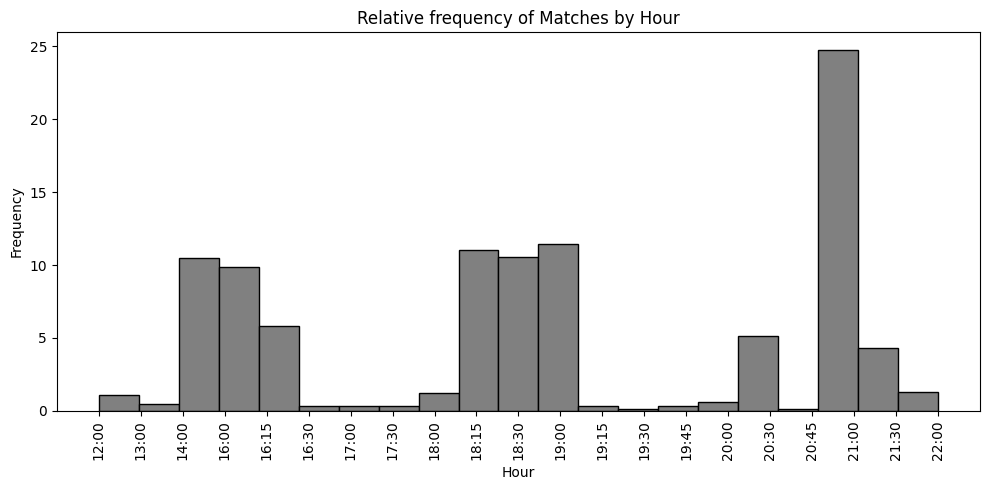

In [35]:
plot_matchtime_hist("2020-2021")

hour_counts = df.loc[df["season"] == "2020-2021", "time"].dropna().value_counts()
plt.bar(hour_counts.index, hour_counts)

4. Build a cross results table for season 2020-2021 (1st division). Figure 1 is an example taken from Wikipedia. Try to make it the most similar to this one, painting the background of each cell according to result (green in case local team wins and red in case visitor team wins). Also, could you model the intensity of this background color with the goal difference from the match?

In [5]:
df1_2020_2021 = df1.loc[df1["season"] == "2020-2021"]
df1_2020_2021

,season,division,matchday,date,time,home_team,away_team,score
25438,2020-2021,1,1,9/12/20,4:00 PM,SD Eibar,Celta de Vigo,0:0
25439,2020-2021,1,1,9/12/20,6:30 PM,Granada CF,Athletic,2:0
25440,2020-2021,1,1,9/12/20,9:00 PM,Cádiz CF,CA Osasuna,0:2
25441,2020-2021,1,1,9/13/20,2:00 PM,Alavés,Real Betis,0:1
25442,2020-2021,1,1,9/13/20,4:00 PM,Real Valladolid,Real Sociedad,1:1
...,...,...,...,...,...,...,...,...
25813,2020-2021,1,38,5/22/21,6:00 PM,CA Osasuna,Real Sociedad,0:1
25814,2020-2021,1,38,5/22/21,6:00 PM,Real Madrid,Villarreal,2:1
25815,2020-2021,1,38,5/22/21,6:00 PM,Real Valladolid,Atlético Madrid,1:2
25816,2020-2021,1,38,5/23/21,6:30 PM,Granada CF,Getafe,0:0


In [6]:
crosstab = pd.crosstab(index = df1_2020_2021["home_team"], columns = df1_2020_2021["away_team"], 
                       values = df1_2020_2021["score"].str.replace(":", "-"),
                       aggfunc = lambda x: " ".join(x)).fillna("--")
crosstab

away_team,Alavés,Athletic,Atlético Madrid,Barcelona,CA Osasuna,Celta de Vigo,Cádiz CF,Elche CF,Getafe,Granada CF,Levante,Real Betis,Real Madrid,Real Sociedad,Real Valladolid,SD Eibar,SD Huesca,Sevilla FC,Valencia,Villarreal
home_team,,,,,,,,,,,,,,,,,,,,
Alavés,--,1-0,1-2,1-1,0-1,1-3,1-1,0-2,0-0,4-2,2-2,0-1,1-4,0-0,1-0,2-1,1-0,1-2,2-2,2-1
Athletic,0-0,--,2-1,2-3,2-2,0-2,0-1,1-0,5-1,2-1,2-0,4-0,0-1,0-1,2-2,1-1,2-0,2-1,1-1,1-1
Atlético Madrid,1-0,2-1,--,1-0,2-1,2-2,4-0,3-1,1-0,6-1,0-2,2-0,1-1,2-1,2-0,5-0,2-0,2-0,3-1,0-0
Barcelona,5-1,2-1,0-0,--,4-0,1-2,1-1,3-0,5-2,1-2,1-0,5-2,1-3,2-1,1-0,1-1,4-1,1-1,2-2,4-0
CA Osasuna,1-1,1-0,1-3,0-2,--,2-0,3-2,2-0,0-0,3-1,1-3,0-2,0-0,0-1,0-0,2-1,1-1,0-2,3-1,1-3
Celta de Vigo,2-0,0-0,0-2,0-3,2-1,--,4-0,3-1,1-0,3-1,2-0,2-3,1-3,1-4,1-1,1-1,2-1,3-4,2-1,0-4
Cádiz CF,3-1,0-4,2-4,2-1,0-2,0-0,--,1-3,0-2,1-1,2-2,0-1,0-3,0-1,0-0,1-0,2-1,1-3,2-1,0-0
Elche CF,0-2,2-0,0-1,0-2,2-2,1-1,1-1,--,1-3,0-1,1-0,1-1,1-1,0-3,1-1,1-0,0-0,2-1,2-1,2-2
Getafe,0-0,1-1,0-0,1-0,1-0,1-1,0-1,1-1,--,0-1,2-1,3-0,0-0,0-1,0-1,0-1,1-0,0-1,3-0,1-3


In [8]:
def color_cells(value):
    if value != '--':
        home_score, away_score = map(int, value.split('-'))
        if home_score > away_score:
            return 'background-color: lightgreen'
        elif home_score < away_score:
            return 'background-color: salmon'
        else:
            return 'background-color: yellow'
    return ''

In [30]:
styled_crosstab = crosstab.style.applymap(color_cells)
styled_crosstab

/tmp/ipykernel_2402/709934697.py:1: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_crosstab = crosstab.style.applymap(color_cells)


away_team,Alavés,Athletic,Atlético Madrid,Barcelona,CA Osasuna,Celta de Vigo,Cádiz CF,Elche CF,Getafe,Granada CF,Levante,Real Betis,Real Madrid,Real Sociedad,Real Valladolid,SD Eibar,SD Huesca,Sevilla FC,Valencia,Villarreal
home_team,,,,,,,,,,,,,,,,,,,,
Alavés,--,1-0,1-2,1-1,0-1,1-3,1-1,0-2,0-0,4-2,2-2,0-1,1-4,0-0,1-0,2-1,1-0,1-2,2-2,2-1
Athletic,0-0,--,2-1,2-3,2-2,0-2,0-1,1-0,5-1,2-1,2-0,4-0,0-1,0-1,2-2,1-1,2-0,2-1,1-1,1-1
Atlético Madrid,1-0,2-1,--,1-0,2-1,2-2,4-0,3-1,1-0,6-1,0-2,2-0,1-1,2-1,2-0,5-0,2-0,2-0,3-1,0-0
Barcelona,5-1,2-1,0-0,--,4-0,1-2,1-1,3-0,5-2,1-2,1-0,5-2,1-3,2-1,1-0,1-1,4-1,1-1,2-2,4-0
CA Osasuna,1-1,1-0,1-3,0-2,--,2-0,3-2,2-0,0-0,3-1,1-3,0-2,0-0,0-1,0-0,2-1,1-1,0-2,3-1,1-3
Celta de Vigo,2-0,0-0,0-2,0-3,2-1,--,4-0,3-1,1-0,3-1,2-0,2-3,1-3,1-4,1-1,1-1,2-1,3-4,2-1,0-4
Cádiz CF,3-1,0-4,2-4,2-1,0-2,0-0,--,1-3,0-2,1-1,2-2,0-1,0-3,0-1,0-0,1-0,2-1,1-3,2-1,0-0
Elche CF,0-2,2-0,0-1,0-2,2-2,1-1,1-1,--,1-3,0-1,1-0,1-1,1-1,0-3,1-1,1-0,0-0,2-1,2-1,2-2
Getafe,0-0,1-1,0-0,1-0,1-0,1-1,0-1,1-1,--,0-1,2-1,3-0,0-0,0-1,0-1,0-1,1-0,0-1,3-0,1-3


In [9]:
#FUNCIÓN:

def plot_cross_results_table(season, division):
    dff = df.loc[(df["division"] == division) & (df["season"] == season)]
    crosstab = pd.crosstab(index = dff["home_team"], columns = dff["away_team"], values = dff["score"].str.replace(":", "-"), 
                       aggfunc = lambda x: " ".join(x)).fillna("--")
    styled_crosstab = crosstab.style.applymap(color_cells) 
    return styled_crosstab
    
plot_cross_results_table("2020-2021", 2)

/tmp/ipykernel_772/3708494293.py:7: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_crosstab = crosstab.style.applymap(color_cells)


away_team,Albacete,Alcorcón,CD Castellón,CD Leganés,CD Lugo,CD Mirandés,CD Tenerife,CE Sabadell,CF Fuenlabrada,Espanyol,FC Cartagena,Girona,Málaga CF,Ponferradina,RCD Mallorca,Rayo Vallecano,Real Oviedo,Real Zaragoza,Sporting Gijón,UD Almería,UD Las Palmas,UD Logroñés
home_team,,,,,,,,,,,,,,,,,,,,,,
Albacete,--,0-1,0-1,0-0,1-1,1-0,0-2,3-0,1-2,0-3,2-0,0-2,1-1,0-2,0-1,2-1,1-1,1-0,0-1,1-2,1-1,1-1
Alcorcón,1-2,--,2-1,1-2,1-0,4-0,2-0,2-0,0-3,1-0,2-1,1-0,0-1,0-1,0-2,0-3,1-1,0-3,1-2,0-1,0-0,1-0
CD Castellón,3-0,0-2,--,2-0,0-1,0-1,0-1,2-1,1-2,1-3,2-1,0-1,0-1,0-2,1-0,0-2,1-0,1-0,2-0,1-2,4-0,0-0
CD Leganés,3-1,1-0,0-0,--,3-2,1-0,1-0,2-1,0-2,2-0,3-1,0-1,1-0,1-1,0-1,1-0,2-1,1-0,0-0,2-1,1-0,3-0
CD Lugo,1-0,1-3,0-0,2-1,--,2-1,2-0,0-1,0-0,1-1,2-1,3-0,0-1,1-0,0-1,1-0,0-0,2-2,0-0,0-2,1-1,1-1
CD Mirandés,0-2,0-0,1-1,0-0,0-0,--,0-0,0-2,2-1,2-2,4-1,3-3,1-0,0-1,0-0,0-2,1-1,1-0,1-0,1-1,2-0,0-1
CD Tenerife,2-0,3-1,1-1,0-0,1-1,1-2,--,1-2,1-1,0-0,3-0,2-0,2-0,1-0,0-1,1-0,2-2,1-0,1-0,0-1,1-1,0-1
CE Sabadell,0-0,1-1,1-1,1-0,1-1,0-2,0-2,--,1-2,0-1,1-1,2-2,1-2,2-0,1-0,2-0,0-1,1-1,1-1,1-2,3-1,0-0
CF Fuenlabrada,1-0,0-0,1-1,0-0,2-0,0-1,1-1,2-2,--,1-1,2-1,1-1,0-2,1-1,4-1,1-2,2-2,0-1,0-0,1-1,1-2,0-0


5. As you surely know, there has always been a historical rivalry between Barcelona and Real Madrid. But which of them has won the most games in direct confrontations? Which of them has scored the most goals in these games? Show both things in two pie charts, side by side Remember to consider ties in the first one.

    Write a function that, given two team names, plots the two graphs described above. Function prototype should be like plot_direct_confrontations_stats(team1, team2) and return the plot object. Use it with some other classical rivals like Betis and Sevilla.

In [13]:
df_RMA_FCB = df[(df['home_team'].isin(['Real Madrid', 'Barcelona'])) & (df['away_team'].isin(['Real Madrid', 'Barcelona']))]
df_RMA_FCB = df_RMA_FCB.dropna(subset=['score'])

home_scores, away_scores = zip(*df_RMA_FCB['score'].str.split(':').apply(lambda x: (int(x[0]), int(x[1]))))
df_RMA_FCB["winner"] = np.where(np.array(home_scores) > np.array(away_scores), df_RMA_FCB['home_team'], 
            np.where(np.array(home_scores) < np.array(away_scores), df_RMA_FCB['away_team'], 'Tie'))

In [14]:
df_RMA_FCB["goals_home"] = df_RMA_FCB["goals_home"].astype("Int64")
df_RMA_FCB["goals_visitor"] = df_RMA_FCB["goals_visitor"].astype("Int64")

df_RMA_FCB


,season,division,matchday,date,time,home_team,away_team,score,goals_home,goals_visitor,result,winner
5,1928-1929,1,2,2/17/29,None,Barcelona,Real Madrid,1:2,1,2,away,Real Madrid
53,1928-1929,1,11,5/9/29,None,Real Madrid,Barcelona,0:1,0,1,away,Barcelona
131,1929-1930,1,9,1/26/30,None,Barcelona,Real Madrid,1:4,1,4,away,Real Madrid
176,1929-1930,1,18,3/30/30,None,Real Madrid,Barcelona,5:1,5,1,home,Real Madrid
221,1930-1931,1,9,2/1/31,None,Real Madrid,Barcelona,0:0,0,0,tie,Tie
...,...,...,...,...,...,...,...,...,...,...,...,...
24932,2018-2019,1,26,3/2/19,8:45 PM,Real Madrid,Barcelona,0:1,0,1,away,Barcelona
25157,2019-2020,1,10,12/18/19,8:00 PM,Barcelona,Real Madrid,0:0,0,0,tie,Tie
25317,2019-2020,1,26,3/1/20,9:00 PM,Real Madrid,Barcelona,2:0,2,0,home,Real Madrid
25499,2020-2021,1,7,10/24/20,4:00 PM,Barcelona,Real Madrid,1:3,1,3,away,Real Madrid


In [15]:
winners_count = df_RMA_FCB["winner"].value_counts()
winners_count

winner
Real Madrid    75
Barcelona      72
Tie            35
Name: count, dtype: int64

In [16]:
homegoals_count = df_RMA_FCB.groupby("home_team")["goals_home"].sum()
visitorgoals_count = df_RMA_FCB.groupby("away_team")["goals_visitor"].sum()

In [17]:
barcelona_goals = homegoals_count["Barcelona"] + visitorgoals_count["Barcelona"]
realmadrid_goals = homegoals_count["Real Madrid"] + visitorgoals_count["Real Madrid"] 

In [18]:
barcelona_goals

290

In [19]:
realmadrid_goals

293

Text(0.5, 1.0, '% of goals in matches between Real Madrid and Barcelona')

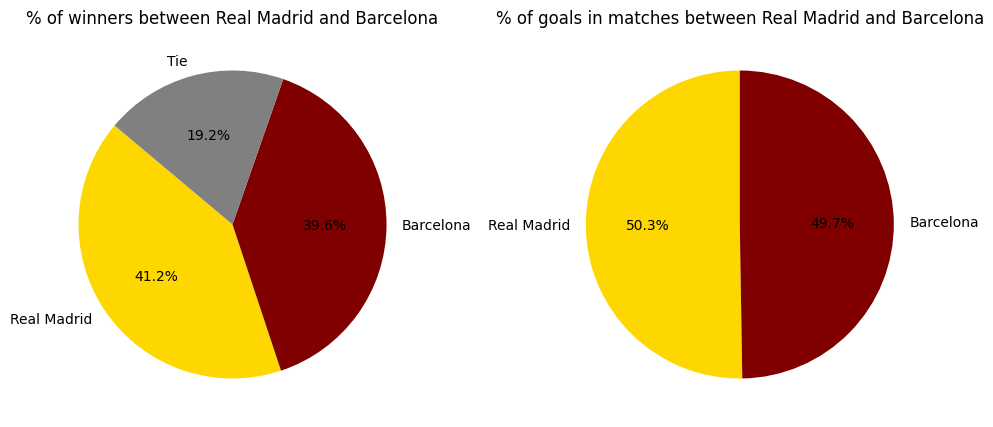

In [20]:
result = ['Real Madrid', 'Barcelona', 'Tie']
win_counts = [winners_count['Real Madrid'], winners_count['Barcelona'], winners_count['Tie']]
goals = [realmadrid_goals, barcelona_goals]

# Plotting the pie chart for match outcomes (Real Madrid Wins, Barcelona Wins, Ties)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.pie(win_counts, labels=result, autopct='%1.1f%%', startangle=140, colors=['gold', 'maroon', 'grey'])
plt.title('% of winners between Real Madrid and Barcelona')

# Plotting the pie chart for total goals (Real Madrid, Barcelona)
plt.subplot(1, 2, 2)
plt.pie(goals, labels=['Real Madrid', 'Barcelona'], autopct='%1.1f%%', startangle=90, colors=['gold', 'maroon'])
plt.title('% of goals in matches between Real Madrid and Barcelona')


In [21]:
def plot_direct_confrontations_stats(team1, team2):
    
    teams = [team1, team2]
    df_teams = df[(df['home_team'].isin(teams)) & (df['away_team'].isin(teams))]
    df_teams = df_teams.dropna(subset=['score'])
    home_scores, away_scores = zip(*df_teams['score'].str.split(':').apply(lambda x: (int(x[0]), int(x[1]))))
    df_teams["winner"] = np.where(np.array(home_scores) > np.array(away_scores), df_teams['home_team'], 
            np.where(np.array(home_scores) < np.array(away_scores), df_teams['away_team'], 'Tie'))
    
    homegoals_count = df_teams.groupby("home_team")["goals_home"].sum()
    visitorgoals_count = df_teams.groupby("away_team")["goals_visitor"].sum()
    team1_goals = homegoals_count[team1] + visitorgoals_count[team1]
    team2_goals = homegoals_count[team2] + visitorgoals_count[team2]
    winners_count = df_teams["winner"].value_counts()
    
    result = [team1, team2, "Tie"]
    win_counts = [winners_count[team1], winners_count[team2], winners_count['Tie']]
    goals = [team1_goals, team2_goals]
    
    fig, axes = plt.subplots(figsize=(12, 5), ncols=2)
    axes[0].pie(win_counts, labels=result, autopct='%1.1f%%', startangle=140, colors=['red', 'blue', 'green'])
    axes[0].set_title(f"% of winners between {team1} and {team2}")

    axes[1].pie(goals, labels=[team1, team2], autopct='%1.1f%%', startangle=90, colors=['orange', 'purple'])
    axes[1].set_title(f"% of goals in matches between {team1} and {team2}")

    plt.tight_layout()

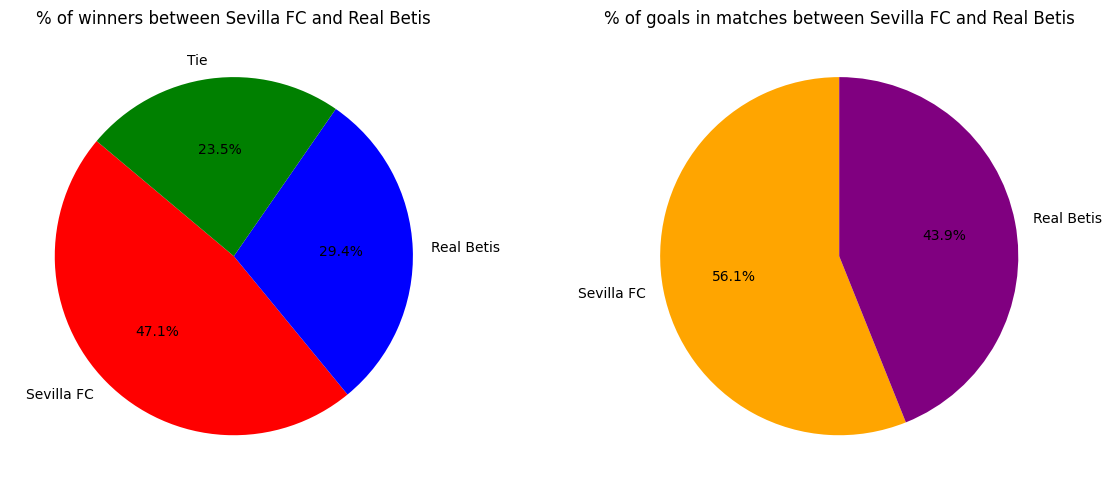

In [22]:
plot_direct_confrontations_stats("Sevilla FC", "Real Betis")

6. Between 1979 and 1980, Real Sociedad managed to chain a total of 38 games without losing. That was, by far, the longest undefeated streak in their history. Which teams have had the longest undefeated streaks? Show the longest undefeated streaks in a horizontal bar plot, indicating in each bar the team name and the dates it held that streak, for instance, Real Sociedad 22/04/1979 - 04/05/1980.

In [33]:
df["team_winner"] = np.where(df["goals_home"] > df["goals_visitor"], df['home_team'], 
            np.where(df["goals_home"] < df["goals_visitor"], df['away_team'], 'Tie'))
df

/tmp/ipykernel_875/2286847726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["team_winner"] = np.where(df["goals_home"] > df["goals_visitor"], df['home_team'],


,season,division,matchday,date,time,home_team,away_team,score,goals_home,goals_visitor,result,team_winner
0,1928-1929,1,1,2029-02-10,NaN,Arenas Club,Athletic Madrid,2:3,2,3,away,Athletic Madrid
1,1928-1929,1,1,2029-02-10,NaN,Espanyol,Real Unión,3:2,3,2,home,Espanyol
2,1928-1929,1,1,2029-02-10,NaN,Real Madrid,Catalunya,5:0,5,0,home,Real Madrid
3,1928-1929,1,1,2029-02-10,NaN,Donostia,Athletic,1:1,1,1,tie,Tie
4,1928-1929,1,1,2029-02-12,NaN,Racing,Barcelona,0:2,0,2,away,Barcelona
...,...,...,...,...,...,...,...,...,...,...,...,...
48345,2021-2022,2,3,2021-08-28,22:00,Ponferradina,Girona,2:1,2,1,home,Ponferradina
48346,2021-2022,2,3,2021-08-29,17:00,SD Amorebieta,UD Almería,2:1,2,1,home,SD Amorebieta
48347,2021-2022,2,3,2021-08-29,19:30,CD Lugo,Real Valladolid,0:2,0,2,away,Real Valladolid
48348,2021-2022,2,3,2021-08-29,19:30,Real Sociedad B,CF Fuenlabrada,0:0,0,0,tie,Tie


In [34]:
home_df = df[['date','home_team', 'team_winner']].rename(columns={'home_team': 'team'})
home_df

,date,team,team_winner
0,2029-02-10,Arenas Club,Athletic Madrid
1,2029-02-10,Espanyol,Espanyol
2,2029-02-10,Real Madrid,Real Madrid
3,2029-02-10,Donostia,Tie
4,2029-02-12,Racing,Barcelona
...,...,...,...
48345,2021-08-28,Ponferradina,Ponferradina
48346,2021-08-29,SD Amorebieta,SD Amorebieta
48347,2021-08-29,CD Lugo,Real Valladolid
48348,2021-08-29,Real Sociedad B,Tie


In [35]:
away_df = df[['date', 'away_team', 'team_winner']].rename(columns={'away_team': 'team'})
away_df

,date,team,team_winner
0,2029-02-10,Athletic Madrid,Athletic Madrid
1,2029-02-10,Real Unión,Espanyol
2,2029-02-10,Catalunya,Real Madrid
3,2029-02-10,Athletic,Tie
4,2029-02-12,Barcelona,Barcelona
...,...,...,...
48345,2021-08-28,Girona,Ponferradina
48346,2021-08-29,UD Almería,SD Amorebieta
48347,2021-08-29,Real Valladolid,Real Valladolid
48348,2021-08-29,CF Fuenlabrada,Tie


In [36]:
combined_df = pd.concat([home_df, away_df])
combined_df.sort_values(by=['team','date'], inplace=True)
combined_df

,date,team,team_winner
10196,1979-09-08,AD Almería,Espanyol
10210,1979-09-16,AD Almería,AD Almería
10215,1979-09-23,AD Almería,Tie
10228,1979-09-30,AD Almería,Tie
10232,1979-10-14,AD Almería,UD Salamanca
...,...,...,...
36806,1997-05-11,Écija Balompié,RCD Mallorca
36818,1997-05-18,Écija Balompié,Tie
36829,1997-05-25,Écija Balompié,Écija Balompié
36838,1997-06-01,Écija Balompié,SD Eibar


In [37]:
combined_df['undefeated'] = combined_df.apply(lambda row: 1 if row['team'] == row['team_winner'] or row['team_winner'] == 'Tie' else 0, axis=1)
combined_df.reset_index(drop=True, inplace=True)
combined_df

,date,team,team_winner,undefeated
0,1979-09-08,AD Almería,Espanyol,0
1,1979-09-16,AD Almería,AD Almería,1
2,1979-09-23,AD Almería,Tie,1
3,1979-09-30,AD Almería,Tie,1
4,1979-10-14,AD Almería,UD Salamanca,0
...,...,...,...,...
95995,1997-05-11,Écija Balompié,RCD Mallorca,0
95996,1997-05-18,Écija Balompié,Tie,1
95997,1997-05-25,Écija Balompié,Écija Balompié,1
95998,1997-06-01,Écija Balompié,SD Eibar,0


In [38]:
mask = combined_df['undefeated'] == 1
combined_df['streak'] = mask.groupby((~mask).cumsum()).cumsum()
combined_df

,date,team,team_winner,undefeated,streak
0,1979-09-08,AD Almería,Espanyol,0,0
1,1979-09-16,AD Almería,AD Almería,1,1
2,1979-09-23,AD Almería,Tie,1,2
3,1979-09-30,AD Almería,Tie,1,3
4,1979-10-14,AD Almería,UD Salamanca,0,0
...,...,...,...,...,...
95995,1997-05-11,Écija Balompié,RCD Mallorca,0,0
95996,1997-05-18,Écija Balompié,Tie,1,1
95997,1997-05-25,Écija Balompié,Écija Balompié,1,2
95998,1997-06-01,Écija Balompié,SD Eibar,0,0


In [39]:
streak_value = combined_df.groupby("team")['streak'].max()
streak_value

team
AD Almería          3
Alavés             14
Albacete           18
Alcorcón            8
Algeciras CF        5
                   ..
Valencia           21
Villarreal         17
Villarreal CF B     6
Xerez CD           13
Écija Balompié      5
Name: streak, Length: 152, dtype: int64

In [40]:
max_indexes = combined_df.groupby('team')['streak'].idxmax()
min_indexes = max_indexes - (streak_value - 1)

In [41]:
end_date = combined_df.loc[max_indexes, "date"]
initial_date = combined_df.loc[min_indexes, "date"]

In [42]:
streak_df = pd.DataFrame(streak_value)
streak_df["initial_date"] = initial_date.values
streak_df["end_date"] = end_date.values
streak_df

,streak,initial_date,end_date
team,,,
AD Almería,3,1979-09-16,1979-09-30
Alavés,14,2004-03-07,2004-05-29
Albacete,18,2003-01-12,2003-05-10
Alcorcón,8,2012-01-08,2012-02-25
Algeciras CF,5,1984-02-12,1984-03-11
...,...,...,...
Valencia,21,2042-01-11,2042-11-22
Villarreal,17,2008-04-20,2008-11-16
Villarreal CF B,6,2011-09-10,2011-10-14


In [43]:
streak_df.sort_values(by="streak", inplace=True, ascending=False)
top_streak = streak_df.head(10)
top_streak

,streak,initial_date,end_date
team,,,
Barcelona,43,2017-04-15,2018-05-09
Real Sociedad,38,1979-04-29,1980-05-04
Real Madrid,31,1988-05-08,1989-04-09
Real Valladolid,29,2006-10-07,2007-04-29
Atlético Madrid,26,2020-02-08,2020-12-05
Sporting Gijón,25,2014-05-10,2015-01-11
Espanyol,22,1993-10-17,1994-03-13
Dep. La Coruña,22,1994-03-06,1994-11-06
UD Las Palmas,21,1997-10-04,1998-02-07


In [51]:
# Extract necessary data for plotting
teams = top_streak.index
streaks = top_streak['streak']
start_dates = top_streak['initial_date']
end_dates = top_streak['end_date']

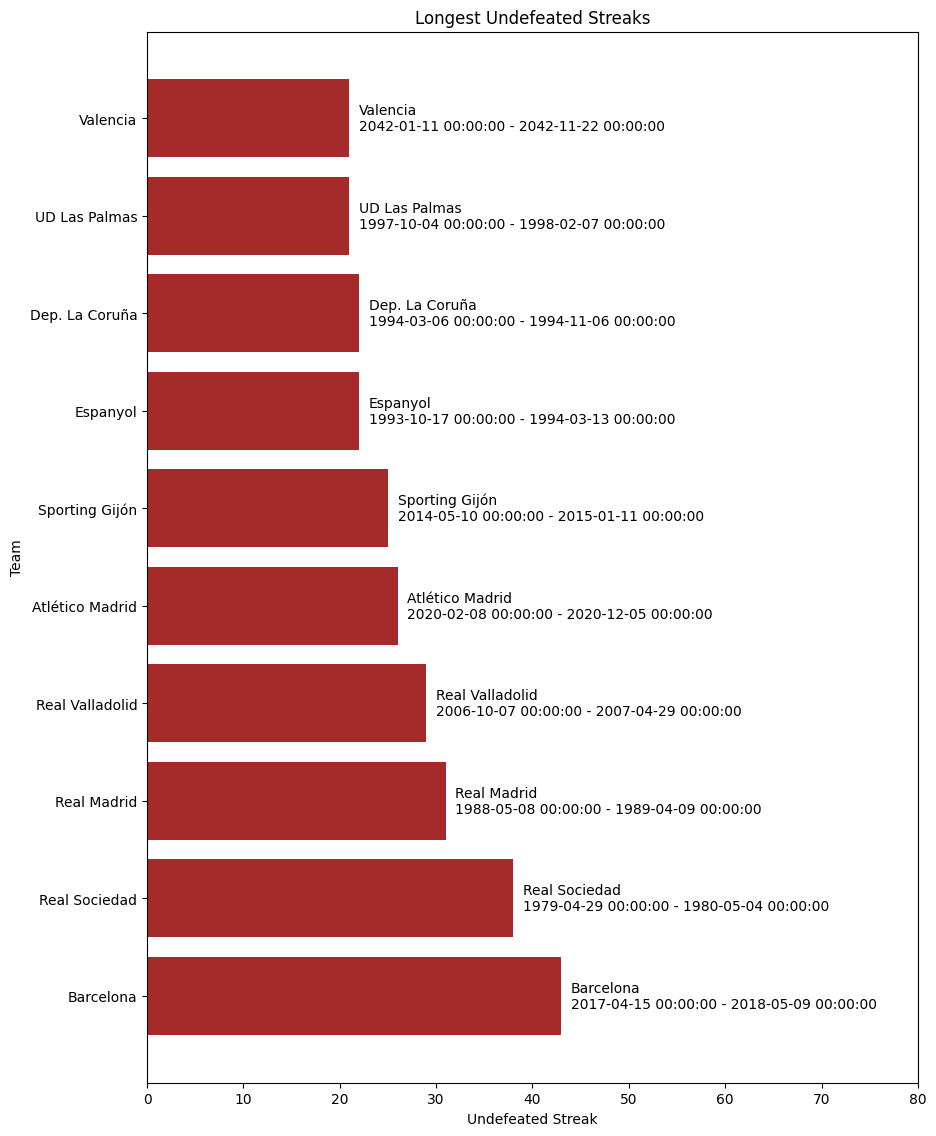

In [48]:
plt.figure(figsize=(10, 12))
plt.barh(teams, streaks, color='brown')
plt.xlabel('Undefeated Streak')
plt.xlim(0, 80)
plt.ylabel('Team')
plt.title('Longest Undefeated Streaks')
plt.xticks(rotation=0)

# Annotate the bars with start and end dates
for i, (team, streak, start_date, end_date) in enumerate(zip(teams, streaks, start_dates, end_dates)):
    plt.text(streak + 1, i, f'{team}\n{start_date} - {end_date}', va='center', ha= "left", fontsize=10)
    
plt.tight_layout(pad=3)

plt.show()